In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use("science")
mpl.rcParams.update({"font.size": 38})

In [2]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/MSc thesis/github/Thesis_name/Simulations/04_Photonic_Crystal_Slabs/Hexagonal_Hole_Hexagonal_Lattice/angle_sweep


In [3]:
for i in range(16):
    globals()["f" + str(i)] = np.genfromtxt(path+"/bands_"+str(i)+".dat", delimiter=",")[:,1:]

In [4]:
light_speed = 3e8
a = 4.10 * 1e-7

w_to_n = light_speed/(a*10**12)

K_index = int(0.33*len(f0[:,1])) 

freq_0 = f0 [K_index, -1]

In [5]:
frequency_shifts = np.zeros(16)
for i in range(16):
     frequency_shifts [i] =  np.abs( globals()["f" + str(i)] [K_index, -1] - freq_0 )

In [6]:
coef = np.polyfit(np.linspace(0, 15, 16), frequency_shifts, 1)
poly1d_fn = np.poly1d(coef) 

In [7]:
print(coef)

[-0.0006047 -0.0019154]


Text(0.5, 0, '$\\alpha$ ($^\\circ$)')

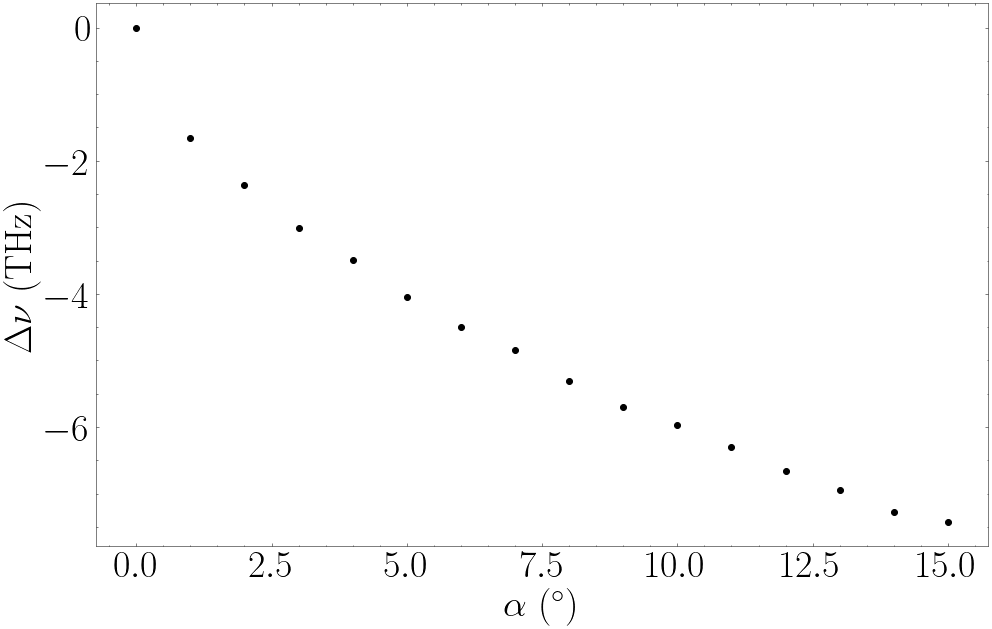

In [8]:
fig, ax = plt.subplots(figsize=(16,10))

x = np.linspace(0, 15, 16)

#ax.set_title('Frequency shift for different design angles')
ax.scatter( x, frequency_shifts*w_to_n, color='black', label = 'Data' )
#ax.plot( x, poly1d_fn(x), color='blue', label = 'Fit: $\\Delta  \\omega a / 2 \pi c$ = '+str(np.around(coef[0],4))+'$\\alpha$ +  '+str(np.around(coef[1],4)))
ax.set_ylabel('$\\Delta\\nu$ (THz) ')
ax.set_xlabel('$\\alpha$ ($^\\circ$)')

In [9]:
def f(x, A, B):
    return  A*(x)**(B)

In [10]:
from  scipy.optimize import curve_fit

opt_params, _ = curve_fit(f, x, frequency_shifts)

In [11]:
opt_params

array([-0.00221861,  0.5662103 ])

In [12]:
opt_params[0]*w_to_n

-1.6233702536041665

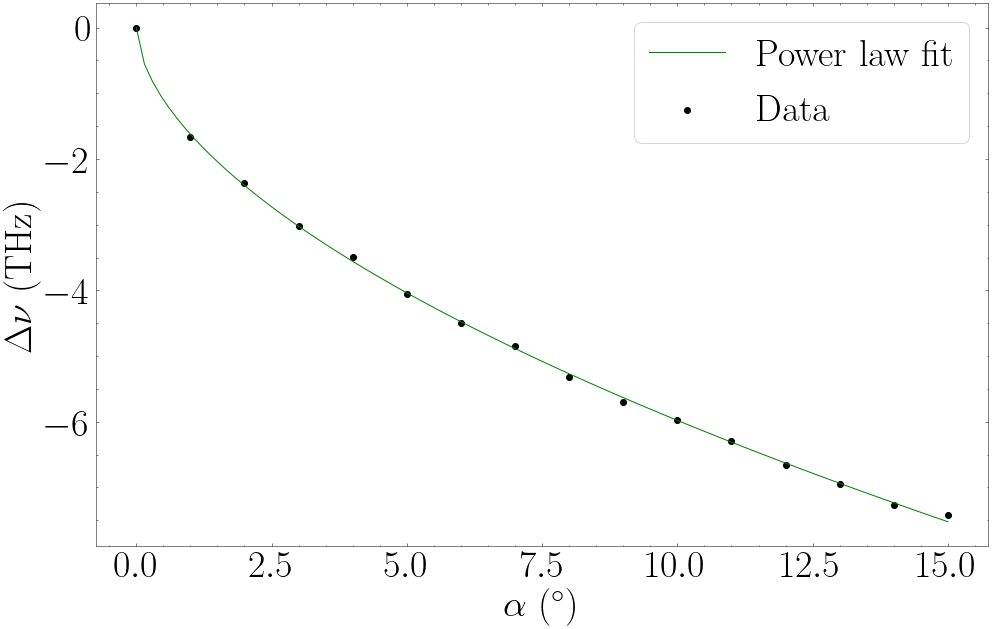

In [13]:
ax.plot( np.linspace(0,15,100), f(np.linspace(0,15,100), opt_params[0], opt_params[1])*w_to_n, color='green', label = "Power law fit")#'Fit: $\\Delta  \\omega a / 2 \pi c$ = '+str(np.around(opt_params[0],4))+'$\\alpha$**'+str(np.around(opt_params[1],4)))
ax.legend(frameon=True)
fig

In [14]:
def f1(x, A, B):
    return  A*(x)+(B)

In [15]:
from  scipy.optimize import curve_fit

opt_params1, _ = curve_fit(f1, x[1:], frequency_shifts[1:])

In [16]:
opt_params1*w_to_n

array([-0.40242334, -1.81529617])

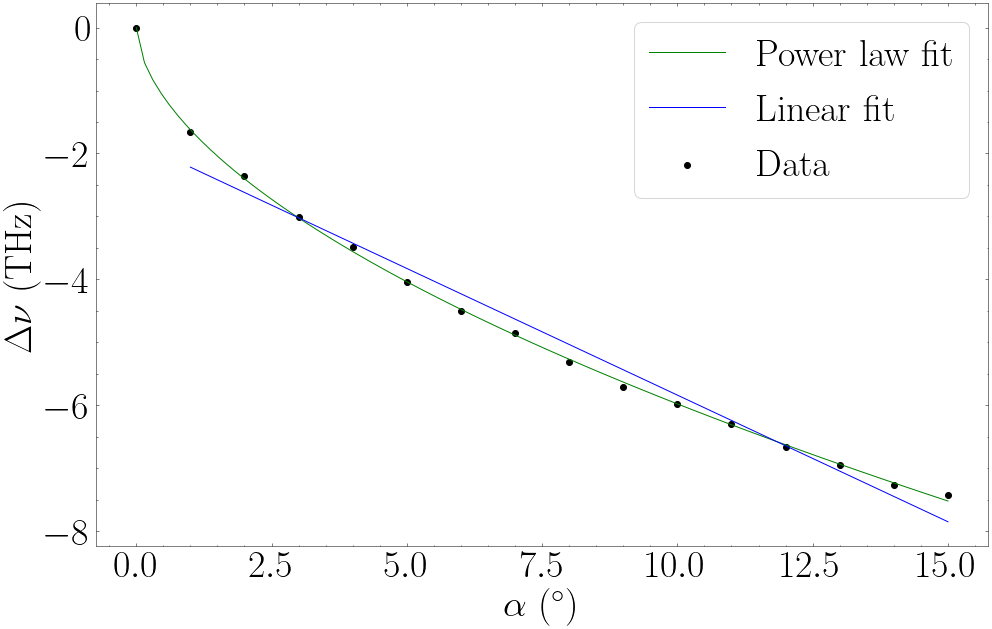

In [17]:
ax.plot( np.linspace(1,15,100), f1(np.linspace(1,15,100), opt_params1[0], opt_params1[1])*w_to_n, color='blue', label = "Linear fit")#'Fit: $\\Delta  \\omega a / 2 \pi c$ = '+str(np.around(opt_params1[0],4))+'$\\alpha$+'+str(np.around(opt_params1[1],4)))
ax.legend(frameon=True)
fig

In [18]:
save = True
if  save == True:
    fig.savefig('data_and_fit_1.pdf')